## Решение уравнения конвекции-диффузии методом конечных разностей

Работу выполнили:

Щудро Т.

Вождаева Ю.

## Стационарное уравнение конвекции-диффузии:
$$Pe\frac{\partial u}{\partial x} - \frac{\partial^2 u}{\partial x^2} = 0$$  на отрезке $[0,1]$ $$u(0) = 0$$ $$u(1) = 1$$ точное решение: $$u(x) = \frac{e^{Pe*x}-1}{e^{Pe}-1}$$

In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
Pe = 100
U0 = 0
Un = 1
N = 100
h = abs(Un - U0) / N
x = np.linspace(U0, Un, N)

## Решение стационарного уравнения конвекции-диффузии с помощью метода конечных разностей: 

1) Дискретизация первого порядка точности (левосторонняя):

$$Pe\frac{u_{i}-u_{i-1}}{\bigtriangleup x} - \frac{u_{i+1}-2u_{i}+u_{i-1}}{(\bigtriangleup x)^2}=0$$

2) Дискретизация первого порядка точности (правосторонняя):

$$Pe\frac{u_{i+1}-u_{i}}{\bigtriangleup x} - \frac{u_{i+1}-2u_{i}+u_{i-1}}{(\bigtriangleup x)^2}=0$$

3) Дискретизация второго порядка точности (центральная):

$$Pe\frac{u_{i+1}-u_{i-1}}{2\bigtriangleup x} - \frac{u_{i+1}-2u_{i}+u_{i-1}}{(\bigtriangleup x)^2}=0$$

In [3]:
class Problem:
    def __init__(self, n):
        self.scheme = ""
        self.a = np.zeros(n - 1)
        self.b = np.zeros(n)
        self.c = np.zeros(n - 1)
        self.f = np.zeros(n)
        self.n = n
        self.Pe = 0
        self.h = 1

    def set_conditions(self, u0, un, Pe, scheme="left"): 
        
    
        self.scheme = scheme
        self.Pe = Pe
        self.h = abs(un - u0) / self.n

        self.f[0] = u0
        self.f[self.n - 1] = un
        for i in range(1, self.n - 1):
            self.f[i] = 0
            
        # Схемы порядка сходимости O(h)
        
        if self.scheme == "left":
            self.a[self.n - 2] = 0
            for i in range(0, self.n - 2):
                self.a[i] = self.Pe * (-1) / self.h - 1 / self.h ** 2

            self.b[0] = 1
            self.b[self.n - 1] = 1
            for i in range(1, self.n - 1):
                self.b[i] = self.Pe * 1 / self.h + 2 / self.h ** 2

            self.c[0] = 0
            for i in range(1, self.n - 1):
                self.c[i] = -1 / self.h ** 2

        elif self.scheme == "right":
            self.a[self.n - 2] = 0
            for i in range(0, self.n - 2):
                self.a[i] = - 1 / self.h ** 2

            self.b[0] = 1
            self.b[self.n - 1] = 1
            for i in range(1, self.n - 1):
                self.b[i] = -self.Pe / self.h + 2 / self.h ** 2

            self.c[0] = 0
            for i in range(1, self.n - 1):
                self.c[i] = self.Pe / self.h - 1 / self.h ** 2
            
        # Схема порядка сходимости O(h^2)

        elif self.scheme == "center":  
            self.a[self.n - 2] = 0
            for i in range(0, self.n - 2):
                self.a[i] = self.Pe * (-1) / self.h / 2 - 1 / self.h ** 2

            self.b[0] = 1
            self.b[self.n - 1] = 1
            for i in range(1, self.n - 1):
                self.b[i] = 2 / self.h ** 2

            self.c[0] = 0
            for i in range(1, self.n - 1):
                self.c[i] = self.Pe / self.h / 2 - 1 / self.h ** 2

    def an_solution(self, x):
        return (np.exp(self.Pe * x) - 1) / (exp(self.Pe) - 1)

    def solve(self):
        b_quote = np.zeros(self.n)
        f_quote = np.zeros(self.n)
        u = np.zeros(self.n)

        b_quote[0] = self.b[0]
        f_quote[0] = self.f[0]
        for i in range(1, self.n):
            try:
                b_quote[i] = self.b[i] - self.a[i - 1] / b_quote[i - 1] * self.c[i - 1]
                f_quote[i] = self.f[i] - self.a[i - 1] / b_quote[i - 1] * f_quote[i - 1]
            except:
                print("zero-error")
                pass

        u[self.n - 1] = f_quote[self.n - 1] / b_quote[self.n - 1]
        for i in range(self.n - 2, -1, -1):
            u[i] = (f_quote[i] - self.c[i] * u[i + 1]) / b_quote[i]

        return u

## Пример решений с шагом сетки $h = 0.01$ при разных числах Пекле

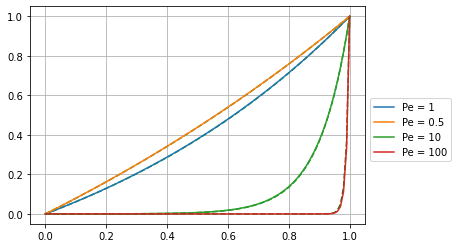

In [4]:
if __name__ == "__main__":
    p = Problem(N)
    for param in [1, 1 / 2, 10, 100]:
        p.set_conditions(U0, Un, param, scheme="center")
        plt.plot(x, p.an_solution(x), color="g", linestyle="dashed")
        plt.plot(x, p.solve(), label = "Pe = "+ str(param))
    plt.grid()
    plt.legend(bbox_to_anchor=(1, 0.6))
    plt.show()


## Примеры решений с шагом сетки $h = 0.1$ и $h = 0.01$ 

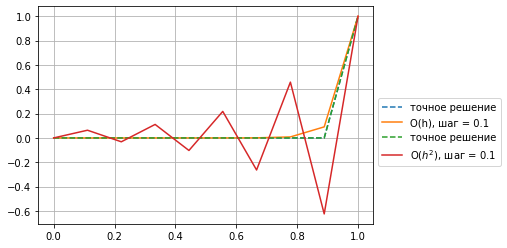

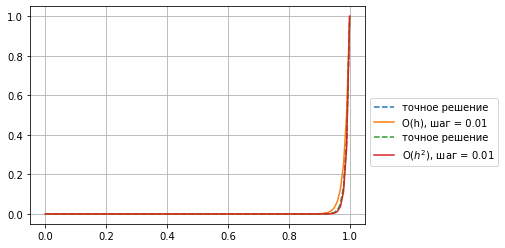

In [5]:
Pe = 100
U0 = 0
Un = 1

for N in [10,100]:
    h = abs(Un - U0) / N
    x = np.linspace(U0, Un, N)
    p = Problem(N)
    
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    p.set_conditions(U0, Un, Pe, scheme="left")
    ax.plot(x, p.an_solution(x), linestyle="dashed", label = "точное решение")
    ax.plot(x, p.solve(), label = f"O(h), шаг = {h}")
    
    p.set_conditions(U0, Un, Pe, scheme="center")
    ax.plot(x, p.an_solution(x), linestyle="dashed", label = "точное решение")
    ax.plot(x, p.solve(), label = f"O($h^2$), шаг = {h}")
    
    plt.grid()
    plt.legend(bbox_to_anchor=(1, 0.6))
    plt.show()


При дискретизации второго порядка точности с большим шагом наблюдаются осцилляции, с измельчением сетки такой эффект исчезает. Наклон численного решения становится более крутым и близким к точному решению при измельчении сетки.

Во всех случаях выполнен принцип максимума:

$$0\leq u(x)\leq 1$$ $$\forall x\in (0,1)$$

кроме дискретизации второго порядка, при не выполнении условия: $Pe\bigtriangleup x\leq 2$. Если условие не выпонено наблюдаются осцилляции.



## Оценка скорости сходимости (с $L^{2}$  нормой)


## Левосторонняя схема

In [6]:
Pe = 100
U0 = 0
Un = 1
N = 50
h = abs(Un - U0) / N
x = np.linspace(U0, Un, N)
p = Problem(N)
p.set_conditions(U0, Un, Pe, scheme="left")
u_analytic = p.an_solution(x)
u = p.solve()

In [7]:
np.linalg.norm(u_analytic - u)

0.22723059912883561

In [178]:
df = pd.DataFrame({"h": [0.1, 1/20, 1/50, 0.01],
                   "Pe = 1": [0.0375, 0.0279, 0.0182, 0.0130],
                   "Pe = 0.5": [0.0165, 0.0121, 0.0079, 0.0056],
                   "Pe = 10": [0.2438, 0.1905, 0.1280, 0.0925],
                   "Pe = 100": [0.0913, 0.1639, 0.2272, 0.2024],
                  })
df

,h,Pe = 1,Pe = 0.5,Pe = 10,Pe = 100
0,0.10,0.0375,0.0165,0.2438,0.0913
1,0.05,0.0279,0.0121,0.1905,0.1639
2,0.02,0.0182,0.0079,0.1280,0.2272
3,0.01,0.0130,0.0056,0.0925,0.2024


## Центральная схема:

In [8]:
Pe = 100
U0 = 0
Un = 1
N = 100
h = abs(Un - U0) / N
x = np.linspace(U0, Un, N)
p = Problem(N)
p.set_conditions(U0, Un, Pe, scheme="center")
u_analytic = p.an_solution(x)
u = p.solve()

In [9]:
np.linalg.norm(u_analytic - u)

0.039691259918842654

In [257]:
df = pd.DataFrame({"h": [0.1, 1/20, 1/50, 0.01],
                   "Pe = 1": [0.0261, 0.0190, 0.0122, 0.0087],
                   "Pe = 0.5": [0.0135, 0.0098, 0.0063, 0.0045],
                   "Pe = 10": [0.0052, 0.0207, 0.0187, 0.0145],
                   "Pe = 100": [0.8631, 0.4790, 0.1310, 0.0397],
                  })
df

,h,Pe = 1,Pe = 0.5,Pe = 10,Pe = 100
0,0.10,0.0261,0.0135,0.0052,0.8631
1,0.05,0.0190,0.0098,0.0207,0.4790
2,0.02,0.0122,0.0063,0.0187,0.1310
3,0.01,0.0087,0.0045,0.0145,0.0397


## Общие выводы:

1) Численное решение, полученное с помощью центральной разностной схемы, сходится к точному с порядком $O(h^{2})$. А с помощью левосторонней и правостонней схем с порядком $O(h)$

2) Принцип максимума для нецентральных схем выполнен всегда. Для центральной схемы достаточным условием выполнения принципа максимума является условие: $Pe\bigtriangleup x\leq 2$. 